<a href="https://colab.research.google.com/github/AdrianAlbrecht/Collab/blob/main/SSI_1%2B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [200]:
import warnings
warnings.filterwarnings('ignore')
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [201]:
def funkcja_przystosowania(x):
    return math.sin(x / 10.0) * math.sin(x / 200.0)

def algorytm_1_plus_1(rozrzut, wsp_przyrostu, l_iteracji, zakres_zmienności):
    x = random.uniform(-zakres_zmienności, zakres_zmienności)
    x_start = x
    y = funkcja_przystosowania(x)
    x_list = [x]
    y_list = [y]

    for i in range(l_iteracji):
        xpot = x + random.uniform(-rozrzut, rozrzut)

        if xpot < -zakres_zmienności:
            xpot = zakres_zmienności
        elif xpot > zakres_zmienności:
            xpot = -zakres_zmienności

        ypot = funkcja_przystosowania(xpot)

        if ypot >= y:
            x = xpot
            y = ypot
            rozrzut *= wsp_przyrostu
            x_list.append(x)
            y_list.append(y)
        else:
            rozrzut /= wsp_przyrostu
        print(f"{i+1}. iteracja: ({x}, {y}) z rozrzutem {rozrzut}")

    return x, y, x_start, [x_list, y_list]

In [202]:
rozrzut = 0.1
wsp_przyrostu = 1.1
l_iteracji = 1000
zakres_zmienności = 25.0

najlepsze_x, najlepsze_y, startowe_x, listy = algorytm_1_plus_1(rozrzut, wsp_przyrostu, l_iteracji, zakres_zmienności)
print(f"Wyniki dla {l_iteracji}. iteracji ze startowego x {startowe_x}")
print("Najlepsza wartość x: ", najlepsze_x)
print("Wartość funkcji przystosowania dla najlepszego x: ", najlepsze_y)

1. iteracja: (-0.3779205658174526, 7.13949368590984e-05) z rozrzutem 0.11000000000000001
2. iteracja: (-0.3779205658174526, 7.13949368590984e-05) z rozrzutem 0.1
3. iteracja: (-0.42679974637796086, 9.105129387732931e-05) z rozrzutem 0.11000000000000001
4. iteracja: (-0.42679974637796086, 9.105129387732931e-05) z rozrzutem 0.1
5. iteracja: (-0.5254475849656147, 0.00013798390852225268) z rozrzutem 0.11000000000000001
6. iteracja: (-0.5254475849656147, 0.00013798390852225268) z rozrzutem 0.1
7. iteracja: (-0.5884701142472795, 0.00017304837057036864) z rozrzutem 0.11000000000000001
8. iteracja: (-0.5884701142472795, 0.00017304837057036864) z rozrzutem 0.1
9. iteracja: (-0.6821019779617068, 0.0002324507540343043) z rozrzutem 0.11000000000000001
10. iteracja: (-0.6821019779617068, 0.0002324507540343043) z rozrzutem 0.1
11. iteracja: (-0.7336246543947046, 0.0002688606414860055) z rozrzutem 0.11000000000000001
12. iteracja: (-0.7568838113192701, 0.0002861624608540926) z rozrzutem 0.12100000000

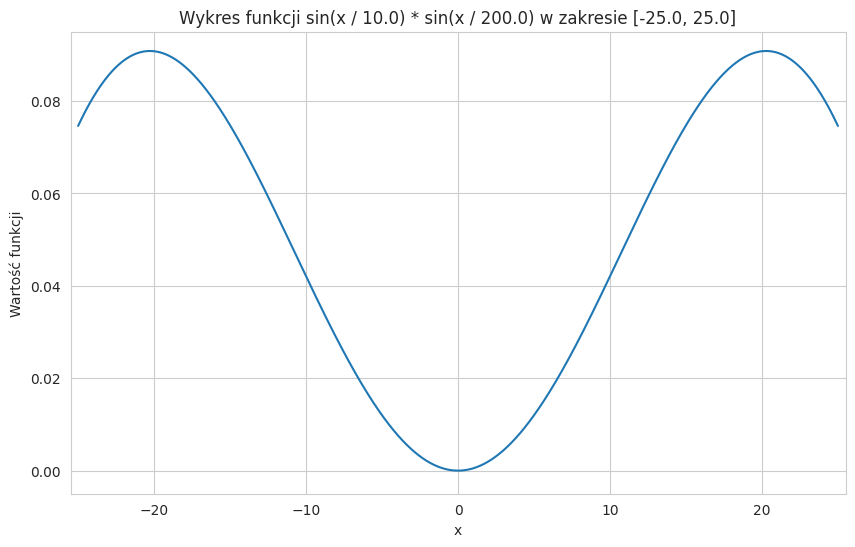

In [203]:
x = np.linspace(zakres_zmienności, -zakres_zmienności, 1000)
y = [math.sin(val / 10.0) * math.sin(val / 200.0) for val in x]

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.ylim(-0.005,0.095)
plt.xlim(-zakres_zmienności-0.5, zakres_zmienności+0.5)
sns.lineplot(x=x, y=y)
plt.title(f"Wykres funkcji sin(x / 10.0) * sin(x / 200.0) w zakresie [{-zakres_zmienności}, {zakres_zmienności}]")
plt.xlabel("x")
plt.ylabel("Wartość funkcji")
plt.show()

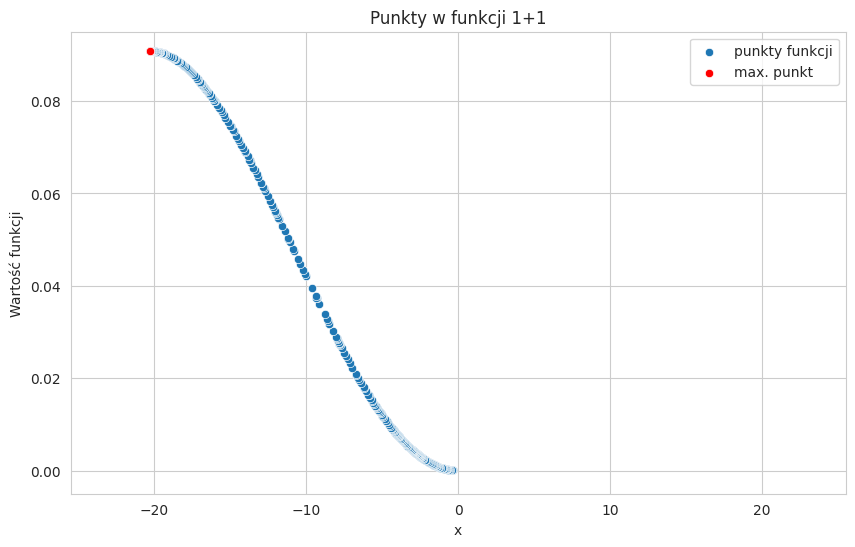

In [204]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.ylim(-0.005,0.095)
plt.xlim(-zakres_zmienności-0.5, zakres_zmienności+0.5)
sns.scatterplot(x=listy[0], y=listy[1], label = 'punkty funkcji')
sns.scatterplot(x=[najlepsze_x], y= [najlepsze_y], c='r', label = 'max. punkt')
plt.legend()
plt.title(f"Punkty w funkcji 1+1")
plt.xlabel("x")
plt.ylabel("Wartość funkcji")
plt.show()